# TP de Aprendizagem de Máquina
### Aluno: Geanderson Esteves dos Santos

Trabalho Prático 1
- Redes Neuronais + Backpropagation

Neste trabalho você irá implementar uma rede neuronal com três camadas:

1. Camada de entrada: cada unidade representa uma dimensão do dado de entrada.

2. Camada oculta: cada unidade representa uma transformação a partir das unidades de entrada.

3. Camada de saída: cada unidade representa a chance da saída correspondente ser a correta.

Você irá utilizar a função Sigmóide para obter não-linearidade. Além disso, a função de perda a ser minimizada é a seguinte:

onde m é a quantidade de entradas no treino, K é o número de saídas possíveis,  representa a saída correta de cada classe k em cada entrada (i), e similarmente representa a saída dada pela rede neuronal.

O dado a ser utilizado está anexado. Trata-se de 5000 entradas, onde cada entrada refere-se a um dígito escrito manualmente (i.e., MNIST dataset). Dessa forma, m=5000 e K=10. Cada entrada é dada por uma matriz de dimensões 28 por 28, ou seja, um vetor de 784 dimensões. A primeira coluna do arquivo sempre é o rótulo do dígito correto.

A rede neuronal a ser implementada deverá ter 784 unidades de entrada e 10 unidades de saída. Em seus experimentos, você deverá variar o número de unidades na camada oculta (25, 50, 100).

Além disso, você deverá comparar os seguintes algoritmos de cálculo de gradiente:

1. Gradient Descent: o gradiente é calculado após cada época (após as 5000 entradas serem processadas).

2. Stochastic Gradient Descent: o gradiente é calculado após cada entrada.

3. Mini-Batch: o gradiente é calculado após um certo número de entradas (considere 10 e 50).

Por fim, você também deverá variar a taxa de aprendizado: 0.5, 1, 10.

O documento a ser entregue deverá apresentar o resultado de seus experimentos. Ou seja, deverá apresentar discussão da variação do número de unidades na camada oculta para cada um dos três algoritmos de cálculo de gradiente. Você deverá apresentar gráficos mostrando a convergência do erro empírico para cada situação (unidades na camada oculta, algoritmo de cálculo do gradiente, taxa de aprendizado). Você deverá deixar claras todas as hipóteses que julgar serem pertinentes.

In [1]:
# Required packages.
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras import optimizers

Using TensorFlow backend.


In [2]:
# Fix random seed for reproducibility.
seed = 7
np.random.seed(seed)

In [3]:
# Load data.
dataset = np.loadtxt("data_tp1", delimiter=",")
X_train = dataset[:, 1:].reshape(dataset.shape[0],1,28, 28).astype('float32')
y_train = dataset[:,0]
X_test = dataset[:,1:].reshape(dataset.shape[0],1, 28, 28).astype('float32')
y_test = dataset[:,0]

In [4]:
# An image is represented by 28*28 then it is a 784 in memory.
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [5]:
# Normalize inputs from 0-255 to 0-1.
X_train = X_train / 255
X_test = X_test / 255

In [6]:
# One hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [7]:
# Define model
def baseline_model(unity, learning_rate):
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(unity, input_dim=unity, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Set the gradient
    sgd = optimizers.SGD(lr=learning_rate)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [8]:
# Build the model.
#unity = 50
#learning_rate = 0.5
#model = baseline_model(unity, learning_rate)
# Fit the model
# default batch size was 200
#model.fit(X_train, y_train, validation_data=(X_test, y_test))
#model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=10, verbose=1)
# Final evaluation of the model
#scores = model.evaluate(X_test, y_test, verbose=2)
#print("Training Error: %.2f%%" % (100-scores[1]*100))

# Testes variando Gradient Descent (GD), Sthocastic Gradient Descent (SGD) e Mini-Batch
### Para efeito de comparação e seguindo as intruções do TP mostradas no primeiro item deste notebook.
##### 1 - Testar o learning rate (0.5, 1, 10) para os 3 gradientes (GD, SGD e Mini-Batch) variando o número de unidades da hidden layer (25, 50, 100). 
##### 2 - Realizar testes complementares sobre o modelo criado. 

In [9]:
# Use the model by parameters.
def use_model(learning_rate, unity, gradient, index):
    lr = learning_rate
    un = unity
    
    if gradient == 'gd':
        inputsGD[index].append(lr)
        model = baseline_model(un, lr)
        model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=5000, verbose=1)
        scores = model.evaluate(X_test, y_test, verbose=0)
        print(100-scores[1]*100)
        outputsGD[index].append(100-scores[1]*100)
    elif gradient == 'sgd':
        inputsSGD[index].append(lr)
        model = baseline_model(un, lr)
        model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=1, verbose=1)
        scores = model.evaluate(X_test, y_test, verbose=0)
        print(100-scores[1]*100)
        outputsSGD[index].append(100-scores[1]*100)
    elif gradient == 'mb10':
        inputsMiniBatch10[index].append(lr)
        model = baseline_model(un, lr)
        model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=10, verbose=1)
        scores = model.evaluate(X_test, y_test, verbose=0)
        print(100-scores[1]*100)
        outputsMiniBatch10[index].append(100-scores[1]*100)
    elif gradient == 'mb50':
        inputsMiniBatch50[index].append(lr)
        model = baseline_model(un, lr)
        model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=50, verbose=1)
        scores = model.evaluate(X_test, y_test, verbose=0)
        print(100-scores[1]*100)
        outputsMiniBatch50[index].append(100-scores[1]*100)

In [10]:
# Set up the arrays with the inputs and outputs of the tests. 
inputsGD = []
inputsGD.append([])
inputsGD.append([])
inputsGD.append([])
outputsGD = []
outputsGD.append([])
outputsGD.append([])
outputsGD.append([])

In [11]:
inputsSGD = []
inputsSGD.append([])
inputsSGD.append([])
inputsSGD.append([])
outputsSGD = []
outputsSGD.append([])
outputsSGD.append([])
outputsSGD.append([])

In [12]:
inputsMiniBatch10 = []
inputsMiniBatch10.append([])
inputsMiniBatch10.append([])
inputsMiniBatch10.append([])
outputsMiniBatch10 = []
outputsMiniBatch10.append([])
outputsMiniBatch10.append([])
outputsMiniBatch10.append([])

In [13]:
inputsMiniBatch50 = []
inputsMiniBatch50.append([])
inputsMiniBatch50.append([])
inputsMiniBatch50.append([])
outputsMiniBatch50 = []
outputsMiniBatch50.append([])
outputsMiniBatch50.append([])
outputsMiniBatch50.append([])

In [15]:
# GD, lr = 0.5, un = 25.
use_model(0.5, 25, 'gd', 0)

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 2s 316us/step - loss: 2.3074 - acc: 0.0932 - val_loss: 2.3034 - val_acc: 0.0918
90.82


In [16]:
# GD, lr = 1, un = 25.
use_model(1, 25, 'gd', 0)

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 1s 128us/step - loss: 2.3053 - acc: 0.1316 - val_loss: 2.2977 - val_acc: 0.1142
88.58


In [17]:
# GD, lr = 10, un = 25.
use_model(10, 25, 'gd', 0)

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 1s 133us/step - loss: 2.3082 - acc: 0.0920 - val_loss: 2.6255 - val_acc: 0.1000
90.0


In [18]:
# SGD, lr = 0.5, un = 25.
use_model(0.5, 25, 'sgd', 0)

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 50s 10ms/step - loss: 3.1733 - acc: 0.0996 - val_loss: 2.6749 - val_acc: 0.1000
90.0


In [19]:
# SGD, lr = 1, un = 25.
use_model(1, 25, 'sgd', 0)

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 66s 13ms/step - loss: 14.5417 - acc: 0.0976 - val_loss: 14.5417 - val_acc: 0.0978
90.22


In [20]:
# SGD, lr = 10, un = 25.
use_model(10, 25, 'sgd', 0)

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 74s 15ms/step - loss: 14.4423 - acc: 0.1038 - val_loss: 14.4418 - val_acc: 0.1040
89.6


In [21]:
# MB10, lr = 0.5, un = 25.
use_model(0.5, 25, 'mb10', 0)

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 11s 2ms/step - loss: 1.6543 - acc: 0.3864 - val_loss: 0.7366 - val_acc: 0.7612
23.879999999999995


In [22]:
# MB10, lr = 1, un = 25.
use_model(1, 25, 'mb10', 0)

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 10s 2ms/step - loss: 2.2900 - acc: 0.1904 - val_loss: 1.9050 - val_acc: 0.3690
63.1


In [23]:
# MB10, lr = 10, un = 25
use_model(10, 25, 'mb10', 0)

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 9s 2ms/step - loss: 7.7324 - acc: 0.1006 - val_loss: 8.0318 - val_acc: 0.1142
88.58


In [24]:
# MB50, lr = 0.5, un = 25.
use_model(0.5, 25, 'mb50', 0)

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 4s 744us/step - loss: 2.2089 - acc: 0.1942 - val_loss: 1.8860 - val_acc: 0.2786
72.14


In [25]:
# MB50, lr = 1, un = 25.
use_model(1, 25, 'mb50', 0)

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 3s 574us/step - loss: 2.2447 - acc: 0.1740 - val_loss: 1.8148 - val_acc: 0.3420
65.8


In [26]:
# MB50, lr = 10, un = 25.
use_model(10, 25, 'mb50', 0) 

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 3s 582us/step - loss: 2.5984 - acc: 0.1002 - val_loss: 3.4417 - val_acc: 0.1024
89.76


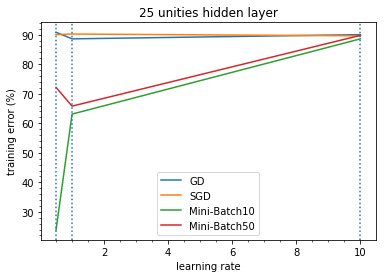

In [27]:
index = 0

plt.plot(inputsGD[index], outputsGD[index], label='GD')
plt.plot(inputsSGD[index], outputsSGD[index], label='SGD')
plt.plot(inputsMiniBatch10[index], outputsMiniBatch10[index], label='Mini-Batch10')
plt.plot(inputsMiniBatch50[index], outputsMiniBatch50[index], label='Mini-Batch50')
plt.xlabel('learning rate')
plt.axvline(x=0.5, ls='dotted')
plt.axvline(x=1, ls='dotted')
plt.axvline(x=10, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("25 unities hidden layer")
plt.legend()
plt.show()

In [28]:
# GD, lr = 0.5, un = 50.
use_model(0.5, 50, 'gd', 1)

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 1s 246us/step - loss: 2.3230 - acc: 0.1222 - val_loss: 2.3015 - val_acc: 0.1142
88.58


In [29]:
# GD, lr = 1, un = 50.
use_model(1, 50, 'gd', 1)

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 4s 711us/step - loss: 2.3168 - acc: 0.0924 - val_loss: 2.3001 - val_acc: 0.1142
88.58


In [30]:
# GD, lr = 1, un = 50.
use_model(10, 50, 'gd', 1)

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 1s 283us/step - loss: 2.3130 - acc: 0.1142 - val_loss: 4.0087 - val_acc: 0.1040
89.6


In [31]:
# SGD, lr = 0.5, un = 50.
use_model(0.5, 50, 'sgd', 1)

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 71s 14ms/step - loss: 5.6154 - acc: 0.1106 - val_loss: 14.4096 - val_acc: 0.1060
89.4


In [32]:
# SGD, lr = 1, un = 50.
use_model(1, 50, 'sgd', 1)

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 75s 15ms/step - loss: 4.5096 - acc: 0.1026 - val_loss: 5.3371 - val_acc: 0.1000
90.0


In [33]:
# SGD, lr = 10, un = 50.
use_model(10, 50, 'sgd', 1)

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 64s 13ms/step - loss: 14.2779 - acc: 0.1140 - val_loss: 14.2774 - val_acc: 0.1142
88.58


In [34]:
# MB10, lr = 0.5, un = 50.
use_model(0.5, 50, 'mb10', 1)

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 7s 1ms/step - loss: 1.5770 - acc: 0.4112 - val_loss: 0.7405 - val_acc: 0.7538
24.620000000000005


In [35]:
# MB10, lr = 1, un = 50.
use_model(1, 50, 'mb10', 1)

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 7s 1ms/step - loss: 1.6783 - acc: 0.3720 - val_loss: 0.8285 - val_acc: 0.7028
29.72


In [36]:
# MB10, lr = 10, un = 50.
use_model(10, 50, 'mb10', 1)

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 7s 1ms/step - loss: 14.4397 - acc: 0.1022 - val_loss: 14.4676 - val_acc: 0.1024
89.76


In [37]:
# MB50, lr = 0.5, un = 50.
use_model(0.5, 50, 'mb50', 1)

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 2s 456us/step - loss: 2.1809 - acc: 0.2002 - val_loss: 1.9179 - val_acc: 0.2166
78.34


In [38]:
# MB50, lr = 1, un = 50.
use_model(1, 50, 'mb50', 1)

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 2s 456us/step - loss: 2.2540 - acc: 0.1692 - val_loss: 2.0019 - val_acc: 0.3280
67.19999999999999


In [39]:
# MB50, lr = 10, un = 50.
use_model(10, 50, 'mb50', 1)

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 2s 413us/step - loss: 2.4724 - acc: 0.1032 - val_loss: 2.4084 - val_acc: 0.1000
90.0


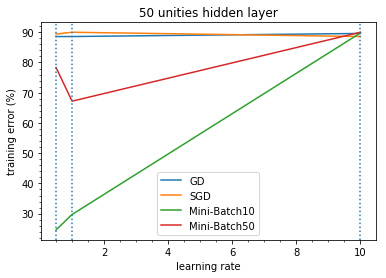

In [40]:
index = 1

plt.plot(inputsGD[index], outputsGD[index], label='GD')
plt.plot(inputsSGD[index], outputsSGD[index], label='SGD')
plt.plot(inputsMiniBatch10[index], outputsMiniBatch10[index], label='Mini-Batch10')
plt.plot(inputsMiniBatch50[index], outputsMiniBatch50[index], label='Mini-Batch50')
plt.xlabel('learning rate')
plt.axvline(x=0.5, ls='dotted')
plt.axvline(x=1, ls='dotted')
plt.axvline(x=10, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("50 unities hidden layer")
plt.legend()
plt.show()

In [41]:
# GD, lr = 0.5, un = 100.
use_model(0.5, 100, 'gd', 2)

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 2s 382us/step - loss: 2.3193 - acc: 0.1000 - val_loss: 2.3048 - val_acc: 0.1142
88.58


In [42]:
# GD, lr = 1, un = 100.
use_model(1, 100, 'gd', 2)

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 2s 302us/step - loss: 2.3204 - acc: 0.0984 - val_loss: 2.3656 - val_acc: 0.1024
89.76


In [43]:
# GD, lr = 1, un = 100.
use_model(10, 100, 'gd', 2)

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 1s 258us/step - loss: 2.3297 - acc: 0.1024 - val_loss: 6.3881 - val_acc: 0.1266
87.34


In [44]:
# SGD, lr = 0.5, un = 100.
use_model(0.5, 100, 'sgd', 2)

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 54s 11ms/step - loss: 14.6357 - acc: 0.0918 - val_loss: 14.6352 - val_acc: 0.0920
90.8


In [45]:
# SGD, lr = 1, un = 100.
use_model(1, 100, 'sgd', 2)

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 58s 12ms/step - loss: 14.5067 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
90.0


In [46]:
# SGD, lr = 10, un = 100.
use_model(10, 100, 'sgd', 2)

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 60s 12ms/step - loss: 14.5067 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
90.0


In [47]:
# MB10, lr = 0.5, un = 100.
use_model(0.5, 100, 'mb10', 2)

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 7s 1ms/step - loss: 1.5741 - acc: 0.4206 - val_loss: 0.6185 - val_acc: 0.7930
20.700000000000003


In [48]:
# MB10, lr = 1, un = 100.
use_model(1, 100, 'mb10', 2)

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 9s 2ms/step - loss: 2.0561 - acc: 0.2426 - val_loss: 1.1570 - val_acc: 0.5416
45.84


In [49]:
# MB10, lr = 10, un = 100.
use_model(10, 100, 'mb10', 2)

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 9s 2ms/step - loss: 14.2473 - acc: 0.1144 - val_loss: 14.2774 - val_acc: 0.1142
88.58


In [50]:
# MB50, lr = 0.5, un = 100.
use_model(0.5, 100, 'mb50', 2)

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 4s 763us/step - loss: 2.1661 - acc: 0.2138 - val_loss: 1.6271 - val_acc: 0.4712
52.88


In [51]:
# MB50, lr = 1, un = 100.
use_model(1, 100, 'mb50', 2)

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 3s 589us/step - loss: 2.2485 - acc: 0.1794 - val_loss: 1.6445 - val_acc: 0.3746
62.54


In [52]:
# MB50, lr = 10, un = 100.
use_model(10, 100, 'mb50', 2)

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
5000/5000 [==============================] - 3s 654us/step - loss: 4.4530 - acc: 0.1038 - val_loss: 4.3756 - val_acc: 0.0920
90.8


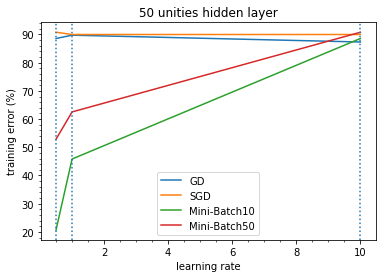

In [53]:
index = 2

plt.plot(inputsGD[index], outputsGD[index], label='GD')
plt.plot(inputsSGD[index], outputsSGD[index], label='SGD')
plt.plot(inputsMiniBatch10[index], outputsMiniBatch10[index], label='Mini-Batch10')
plt.plot(inputsMiniBatch50[index], outputsMiniBatch50[index], label='Mini-Batch50')
plt.xlabel('learning rate')
plt.axvline(x=0.5, ls='dotted')
plt.axvline(x=1, ls='dotted')
plt.axvline(x=10, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("50 unities hidden layer")
plt.legend()
plt.show()

# Discussão dos Resultados

Primeiramente, podemos notar nos gráficos apresentados acima que dois dos gradientes testados nunca obtiveram resultados interessantes para o problema de classificação de imagens (aka MNIS), i.e., GD e SGD obtiveram resultados muito ruins para o training error. As condições definidas no enunciado do TP podem ter influenciado diretamente os resultados desses dois algoritmos em termos do uso da sigmoid para não linearidade e também do learning rate ter sido uma medida um pouco elevada (i.e., 0.5 foi o menos valor testado e 10 o maior valor testado). Assim, o mini-batch foi o gradiente mais eficiente entre os testados, com destaque para o mini-batch de 10 batches que obteve resultados ligeiramente melhores do que o mini-batch de 50. 

O training error foi baixo se considerarmos que o conjunto de teste foi o próprio conjunto de treino, prática essa que deve ser evitada em casos reais de aplicação de algoritmos de machine learning no mundo real. Assim, embora o training error ter sido baixo em dois dos gradientes testados (i.e., mini-batch de 10 e 50), isso não significa que o nosso modelo seja bom, pois o test error pode ser alto. Assim, em uma análise real do MINIS o mais adequado seria ter um conjunto de treino (assim como foi feito), um conjunto de teste, e mesmo a separação em um conjunto de validação com uma cross-validation seria o cenário perfeito de teste.

É importante notar que o learning rate propostos no enunciado podem ser considerados bastante elevados, pois como foi visto em sala de aula muitos dos modelos de machine learning usam 0.1 para essa métrica. No entanto, a aplicação de um learning rate de 10 assim como no último dos testes realizados mostrou que este valor era muito alto para o problema de classificação proposto no enunciado. Assim, o learning rate de 10 apresentou resultados muitos ruins para todos os gradientes testados independente do número de unidades da camada oculta (o training error foi de ~90% para todos os 3 gradientes e as mesmo nas duas variações do mini-batch, que obtiveram resultados melhores para o problema). 

Em relação as unidades da camada oculta, a variação não podem ser considerada relevante em nenhuma das condições testadas, i.e., as unidades de 25, 50 e 100 unidades da camada oculta apresentaram resultados similares para o problema. Sendo assim, 



Text(0.5,1,'50 unities hidden layer')

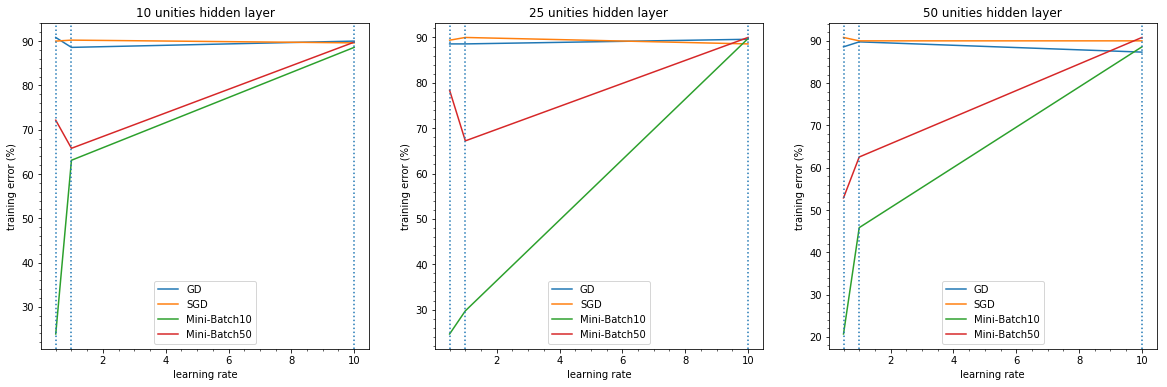

In [68]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))
ax1.plot(inputsGD[0], outputsGD[0], label='GD')
ax1.plot(inputsSGD[0], outputsSGD[0], label='SGD')
ax1.plot(inputsMiniBatch10[0], outputsMiniBatch10[0], label='Mini-Batch10')
ax1.plot(inputsMiniBatch50[0], outputsMiniBatch50[0], label='Mini-Batch50')
ax1.axvline(x=0.5, ls='dotted')
ax1.axvline(x=1, ls='dotted')
ax1.axvline(x=10, ls='dotted')
ax1.minorticks_on()
ax1.legend()
ax1.set_xlabel('learning rate')
ax1.set_ylabel('training error (%)')
ax1.set_title('10 unities hidden layer')

ax2.plot(inputsGD[1], outputsGD[1], label='GD')
ax2.plot(inputsSGD[1], outputsSGD[1], label='SGD')
ax2.plot(inputsMiniBatch10[1], outputsMiniBatch10[1], label='Mini-Batch10')
ax2.plot(inputsMiniBatch50[1], outputsMiniBatch50[1], label='Mini-Batch50')
ax2.axvline(x=0.5, ls='dotted')
ax2.axvline(x=1, ls='dotted')
ax2.axvline(x=10, ls='dotted')
ax2.minorticks_on()
ax2.legend()
ax2.set_xlabel('learning rate')
ax2.set_ylabel('training error (%)')
ax2.set_title('25 unities hidden layer')

ax3.plot(inputsGD[2], outputsGD[2], label='GD')
ax3.plot(inputsSGD[2], outputsSGD[2], label='SGD')
ax3.plot(inputsMiniBatch10[2], outputsMiniBatch10[2], label='Mini-Batch10')
ax3.plot(inputsMiniBatch50[2], outputsMiniBatch50[2], label='Mini-Batch50')
ax3.axvline(x=0.5, ls='dotted')
ax3.axvline(x=1, ls='dotted')
ax3.axvline(x=10, ls='dotted')
ax3.minorticks_on()
ax3.legend()
ax3.set_xlabel('learning rate')
ax3.set_ylabel('training error (%)')
ax3.set_title('50 unities hidden layer')